In [1]:
# Packages for data processing and simple data visualization
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing spreadsheets
df1 = pd.read_csv('patents_1.csv')
df2 = pd.read_csv('patents_2a.csv')

In [3]:
df1.head()

,Fintiv Denials,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Case Number,Instiution Date,Outcome,Grounds,Notes
1,IPR2019-00961,10/16/2019,Not Instituted - Procedural,NHK Spring / Fintiv,NaN
2,IPR2019-00962,10/16/2019,Not Instituted - Procedural,NHK Spring / Fintiv,NaN
3,IPR2019-00161,5/15/2019,Not Instituted - Procedural,NHK Spring / Fintiv,NaN
4,IPR2019-00162,6/5/2019,Not Instituted - Procedural,NHK Spring / Fintiv,NaN


In [4]:
# Making first row column names 
df1.columns = df1.iloc[0]
df2.columns = df2.iloc[0]
# Removing first row of column title names from spreadsheet
df1 = df1.iloc[1: , :]
df2 = df2.iloc[1: , :]
# Renaming second column so it matches second dataframe
df1 = df1.rename(columns={"Instiution Date": "Institution Date"})
# Dropping Notes and Link column
df1 = df1.drop(['Notes'], axis=1)
df2 = df2.drop(['Link'], axis=1)

In [5]:
df1.head()

,Case Number,Institution Date,Outcome,Grounds
1,IPR2019-00961,10/16/2019,Not Instituted - Procedural,NHK Spring / Fintiv
2,IPR2019-00962,10/16/2019,Not Instituted - Procedural,NHK Spring / Fintiv
3,IPR2019-00161,5/15/2019,Not Instituted - Procedural,NHK Spring / Fintiv
4,IPR2019-00162,6/5/2019,Not Instituted - Procedural,NHK Spring / Fintiv
5,IPR2019-01445,1/22/2020,Not Instituted - Procedural,NHK Spring / Fintiv


In [6]:
df2.head()

,Case Number,Institution Date,Outcome,Grounds
1,CBM2020-00002,2020-05-19,Instituted,NHK Spring / Fintiv
2,CBM2020-00003,2020-05-19,Instituted,NHK Spring / Fintiv
3,CBM2020-00004,2020-05-19,Instituted,NHK Spring / Fintiv
4,CBM2020-00011,2020-09-23,Instituted,NHK Spring / Fintiv
5,CBM2020-00012,2020-10-05,Instituted,NHK Spring / Fintiv


In [7]:
# Converting date column to datetime
df1['Institution Date']= pd.to_datetime(df1['Institution Date'])
df2['Institution Date']= pd.to_datetime(df2['Institution Date'])

In [8]:
# Group dates by month and count cases per month
df1a = df1.groupby(pd.Grouper(key='Institution Date',  freq='Q')).size()
df2a = df2.groupby(pd.Grouper(key='Institution Date',  freq='Q')).size()

In [9]:
df1a.head()

Institution Date
2019-06-30     2
2019-09-30     0
2019-12-31     3
2020-03-31     9
2020-06-30    16
Freq: Q-DEC, dtype: int64

In [10]:
# Convert to pandas dataframe
df1a = df1a.to_frame()
df2a = df2a.to_frame()
# Reset index
df1a = df1a.reset_index()
df2a = df2a.reset_index()
# Rename count column to not instituted / instituted
df1a.rename(columns={df1a.columns[1]:'not instituted'}, inplace=True)
df2a.rename(columns={df2a.columns[1]:'instituted'}, inplace=True)

In [11]:
df1a.head()

,Institution Date,not instituted
0,2019-06-30,2
1,2019-09-30,0
2,2019-12-31,3
3,2020-03-31,9
4,2020-06-30,16


In [12]:
# Merge dataframes to include all dates in each
df = pd.merge(df1a, df2a, how="outer")
# Fill blank cells with 0 
df.fillna(0, inplace=True)

In [13]:
df.head()

,Institution Date,not instituted,instituted
0,2019-06-30,2,0.0
1,2019-09-30,0,0.0
2,2019-12-31,3,0.0
3,2020-03-31,9,1.0
4,2020-06-30,16,32.0


In [14]:
# Convert columns to integers
df["instituted"] = df["instituted"].astype(int)
df['not instituted'] = df['not instituted'].astype(int)

In [15]:
df.head()

,Institution Date,not instituted,instituted
0,2019-06-30,2,0
1,2019-09-30,0,0
2,2019-12-31,3,0
3,2020-03-31,9,1
4,2020-06-30,16,32


In [16]:
# Convert dates to omit day
df['Institution Date'] = df['Institution Date'].dt.to_period('Q')

In [17]:
df.head()

,Institution Date,not instituted,instituted
0,2019Q2,2,0
1,2019Q3,0,0
2,2019Q4,3,0
3,2020Q1,9,1
4,2020Q2,16,32


In [18]:
# Convert dates to string for visualization
df['Institution Date'] = df['Institution Date'].astype(str)

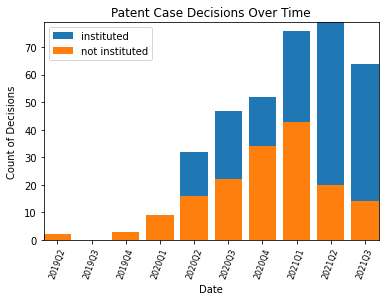

In [19]:
# Label data for x and y axes
x = df['Institution Date']
y1 = df['instituted']
y2 = df['not instituted']
  
# plot data with legend
fig = plt.subplots()
plt.bar(x, y1, label = "instituted")
plt.bar(x, y2, label = "not instituted")
plt.legend()

# Close margins for no extra space
plt.margins(x=0, y=0)

# Add title and labels for axes
plt.title("Patent Case Decisions Over Time")
plt.ylabel("Count of Decisions", labelpad=7)
plt.xlabel("Date")

# Rotate and shrink dates for readability
plt.xticks(rotation = 70)
plt.tick_params(axis='x', which='major', labelsize=8)

# Plot graph with grid
plt.show()

In [26]:
df

,Institution Date,not instituted,instituted
0,2019Q2,2,0
1,2019Q3,0,0
2,2019Q4,3,0
3,2020Q1,9,1
4,2020Q2,16,32
5,2020Q3,22,47
6,2020Q4,34,52
7,2021Q1,43,76
8,2021Q2,20,79
9,2021Q3,14,64


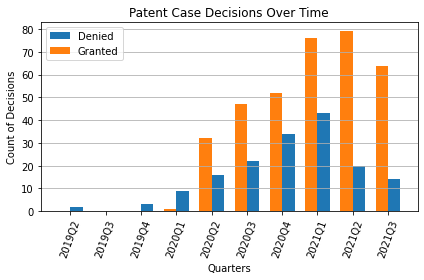

In [24]:
import matplotlib.pyplot as plt
import numpy as np


labels = df['Institution Date']
y2 = df['instituted']
y1 = df['not instituted']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects2 = ax.bar(x + width/2, y1, width, label='Denied', color='tab:blue')
rects1 = ax.bar(x - width/2, y2, width, label='Granted', color='tab:orange')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Decisions')
ax.set_xlabel('Quarters')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

In [21]:
df1 = df[4::]

In [22]:
df1

,Institution Date,not instituted,instituted
4,2020Q2,16,32
5,2020Q3,22,47
6,2020Q4,34,52
7,2021Q1,43,76
8,2021Q2,20,79
9,2021Q3,14,64


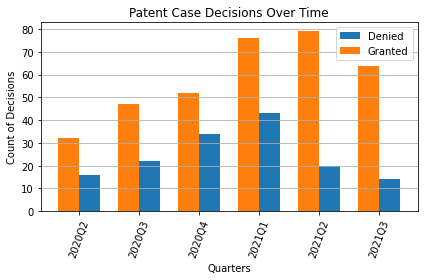

In [23]:
import matplotlib.pyplot as plt
import numpy as np


labels = df1['Institution Date']
y2 = df1['instituted']
y1 = df1['not instituted']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects2 = ax.bar(x + width/2, y1, width, label='Denied', color='tab:blue')
rects1 = ax.bar(x - width/2, y2, width, label='Granted', color='tab:orange')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Decisions')
ax.set_xlabel('Quarters')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

In [95]:
# Save condensed data
df.to_csv('patent_time_series_quarters.csv')

In [56]:
# Select 2021 data
df2021 = df.iloc[20::]

In [57]:
df2021.head()

,Institution Date,not instituted,instituted
20,2021-01,14,29
21,2021-02,13,33
22,2021-03,16,14
23,2021-04,3,32
24,2021-05,6,28


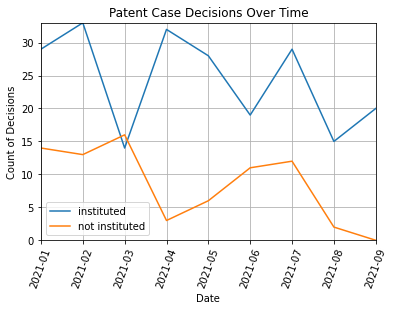

In [59]:
# Label data for x and y axes
x = df2021['Institution Date']
y1 = df2021['instituted']
y2 = df2021['not instituted']
  
# plot data with legend
plt.plot(x, y1, label = "instituted")
plt.plot(x, y2, label = "not instituted")
plt.legend()

# Close margins for no extra space
plt.margins(x=0, y=0)

# Add title and labels for axes
plt.title("Patent Case Decisions Over Time")
plt.ylabel("Count of Decisions")
plt.xlabel("Date")

# Rotate dates for readability
plt.xticks(rotation = 70)

# Plot graph with grid
plt.grid()
plt.show()

In [3]:
pd.read_csv('patent_time_series.csv', index_col=0)

,Institution Date,not instituted,instituted
0,2019-05,1.0,0
1,2019-06,1.0,0
2,2019-07,0.0,0
3,2019-08,0.0,0
4,2019-09,0.0,0
5,2019-10,3.0,0
6,2019-11,0.0,0
7,2019-12,0.0,0
8,2020-01,3.0,1
9,2020-02,1.0,0


In [41]:
dfp = pd.read_csv('patent_perc_2.csv')

In [37]:
dfp.head()

,Institution Date,denied,granted,Percentage of cases being denied,Percentage of cases being granted,Sum
0,2019Q2,2,0,100,0,2
1,2019Q3,0,0,0,0,0
2,2019Q4,3,0,100,0,103
3,2020Q1,9,1,90,10,10
4,2020Q2,16,32,33,67,48


In [39]:
dfp['Percentage of cases being granted'] = 100

In [ ]:
dfp

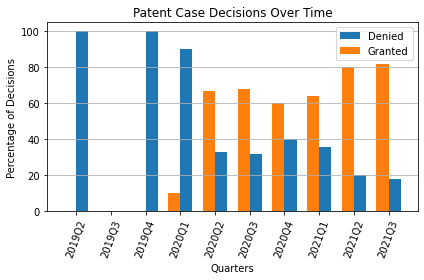

In [49]:
import matplotlib.pyplot as plt
import numpy as np


labels = dfp['Institution Date']
y2 = dfp['Percentage of cases being granted']
y1 = dfp['Percentage of cases being denied']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects2 = ax.bar(x + width/2, y1, width, label='Denied', color='tab:blue')
rects1 = ax.bar(x - width/2, y2, width, label='Granted', color='tab:orange')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Decisions')
ax.set_xlabel('Quarters')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

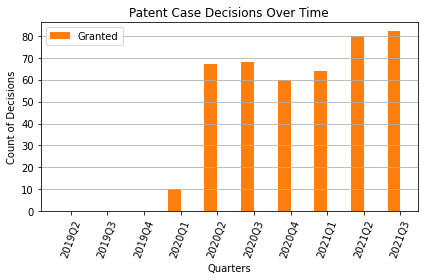

In [43]:
import matplotlib.pyplot as plt
import numpy as np


labels = dfp['Institution Date']
y2 = dfp['Percentage of cases being granted']
y1 = dfp['Percentage of cases being denied']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()



rects1 = ax.bar(x - width/2, y2, width, label='Granted', color='tab:orange')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Decisions')
ax.set_xlabel('Quarters')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

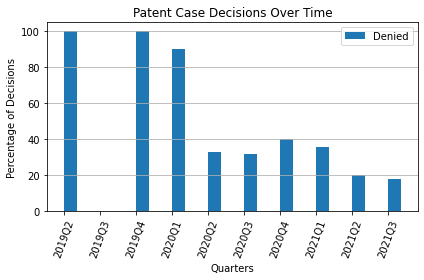

In [50]:
import matplotlib.pyplot as plt
import numpy as np


labels = dfp['Institution Date']
y2 = dfp['Percentage of cases being granted']
y1 = dfp['Percentage of cases being denied']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects2 = ax.bar(x + width/2, y1, width, label='Denied', color='tab:blue')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Decisions')
ax.set_xlabel('Quarters')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

In [46]:
dfp1 = dfp[4::]

In [ ]:
# Label data for x and y axes
x = dfp['Institution Date']
y1 = dfp['instituted']
y2 = dfp['not instituted']
  
# plot data with legend
fig = plt.subplots()
plt.bar(x, y1, label = "granted")
plt.bar(x, y2, label = "denied")
plt.legend()

# Close margins for no extra space
plt.margins(x=0, y=0)

# Add title and labels for axes
plt.title("Patent Case Decisions Over Time")
plt.ylabel("Count of Decisions", labelpad=7)
plt.xlabel("Date")

# Rotate and shrink dates for readability
plt.xticks(rotation = 70)
plt.tick_params(axis='x', which='major', labelsize=8)

# Plot graph with grid
plt.show()

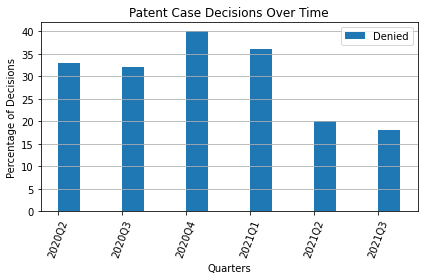

In [51]:
import matplotlib.pyplot as plt
import numpy as np


labels = dfp1['Institution Date']
y2 = dfp1['Percentage of cases being granted']
y1 = dfp1['Percentage of cases being denied']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects2 = ax.bar(x + width/2, y1, width, label='Denied', color='tab:blue')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Decisions')
ax.set_xlabel('Quarters')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

In [53]:
dffy = pd.read_csv('patent_fy.csv')

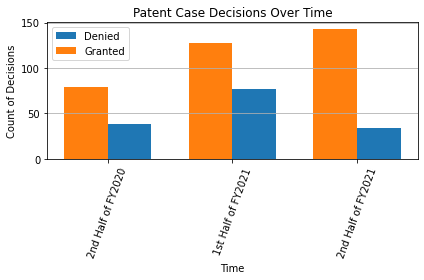

In [56]:
import matplotlib.pyplot as plt
import numpy as np


labels = dffy['Institution Date']
y2 = dffy['Granted']
y1 = dffy['Denied']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()


rects2 = ax.bar(x + width/2, y1, width, label='Denied', color='tab:blue')
rects1 = ax.bar(x - width/2, y2, width, label='Granted', color='tab:orange')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Decisions')
ax.set_xlabel('Time')
ax.set_title('Patent Case Decisions Over Time')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.legend()


fig.tight_layout()

ax.grid(axis='y')

plt.show()

In [57]:
dffy2 = pd.read_csv('patent_fy2.csv')

In [59]:
dffy2

,Institution Date,Denied,Granted
0,2020-05,10,9
1,2020-06,6,23
2,2020-07,2,7
3,2020-08,11,20
4,2020-09,9,20
5,2020-10,16,16
6,2020-11,15,15
7,2020-12,3,21
8,2021-01,14,29
9,2021-02,13,33


In [64]:
dffy2a = dffy2[19:22]

In [65]:
dffy2a

,Institution Date,Denied,Granted
19,2nd Half FY2020 Percentage,32,68
20,1st Half FY2021 Percentage,38,62
21,2nd Half FY2021 Percentage,22,78


In [78]:
dffy2a['Denied'][19]

32

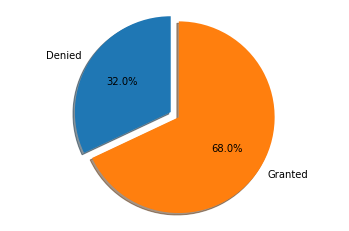

In [80]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dffy2a.columns[1:3]
sizes = dffy2a['Denied'][19], dffy2a['Granted'][19]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()